
# Linear Regression

> Linear modeling by the most elementary model : simple linear regression where a variable X is explained, modelled by an affine function of another variable y. Mostly used to predict **continuous value outputs**.


#### First of all, what is linear ?

The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

A linear regression model in two dimensions is a straight line; in three dimensions it is a plane, and in more than three dimensions, a hyperplane.

#### In this example, we will use Scikit-Learn which is a Python machine learning library.



#### Goal : 

* Y the real random variable to be explained (endogenous, dependent or response variable)
* X the explanatory variable or fixed effect (exogenous). 
* We assume that, on average, E(Y), is an affine function of X. Writing the model implicitly assumes a prior notion of causality in the sense that Y depends on X because the model is not symmetrical.

We want to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). By ploting variables, linear regression gives us a straight line that best fits the data points.

#### Basic linear equation : 
Y = mx + b 
* b : intercept
* m : slope

#### So, what does the linear regression algorithm ?
It gives us the most optimal value for the intercept and the slope. Y and X can't be changed since they are fixed data. The only values that we can control are **b and m**.
The algorithm check for the line with the least error, that fits the most **data points**.

## Simple linear regression

In [75]:
## Data from : https://www.kaggle.com/dronio/SolarEnergy?select=SolarPrediction.csv

In [76]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [77]:
dataset = pd.read_csv('/Users/Laurine/Documents/Python Scripts/IMAC2/Untitled Folder/SolarPrediction.csv')

In [78]:
## See data
dataset.describe()


,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


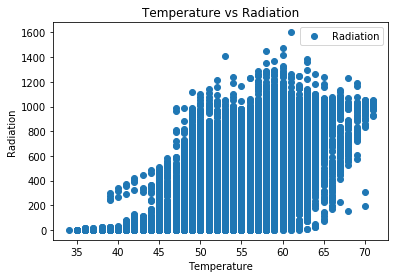

In [79]:
##  predict the maximum temperature taking input feature as the radiation.

dataset.plot(x='Temperature', y='Radiation', style='o')  
plt.title('Temperature vs Radiation')  
plt.xlabel('Temperature')  
plt.ylabel('Radiation')  
plt.show()

C:\Users\Laurine\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


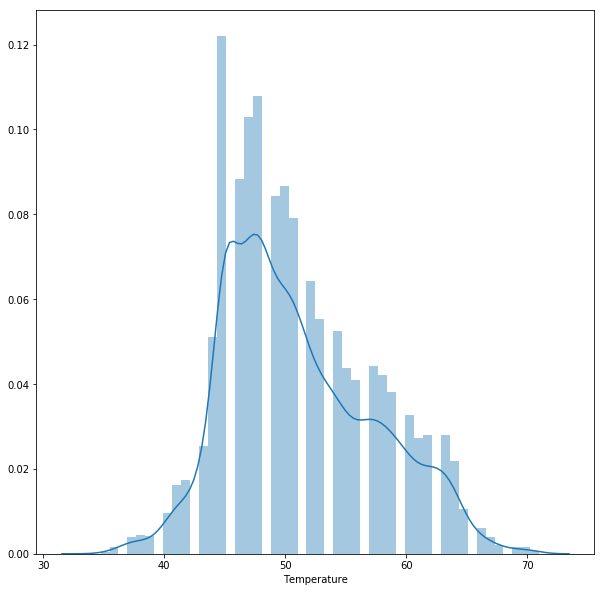

In [80]:
## We need to check the average temperature : we see that it is around 45 - 50

plt.figure(figsize=(10,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Temperature'])

In [81]:
## We need to divide the data into attributes (independant variables) and labels (dependant variables). Labels are values we want to predict
## Here, our attribute is "radiation" and our label is "temperature"

X = dataset['Radiation'].values.reshape(-1,1)
y = dataset['Temperature'].values.reshape(-1,1)

In [82]:
## We need to split the data between the training and the test set. Let say we give 70% of the data to the training set and 30 % to the test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [83]:
## It is time to traing our algorithm ! 

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
## We found the best value for the intercept (b) and the slope (m)

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[48.12878042]
[[0.01442639]]


In [85]:
## Time to make prediction ! (we need to use the test dataset and compare it to actual data)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,61,55.021276
1,48,53.897460
2,60,61.260833
3,44,48.146381
4,49,48.147102
5,50,48.147102
6,54,48.310120
7,45,48.146092
8,53,48.176965
9,46,48.146669


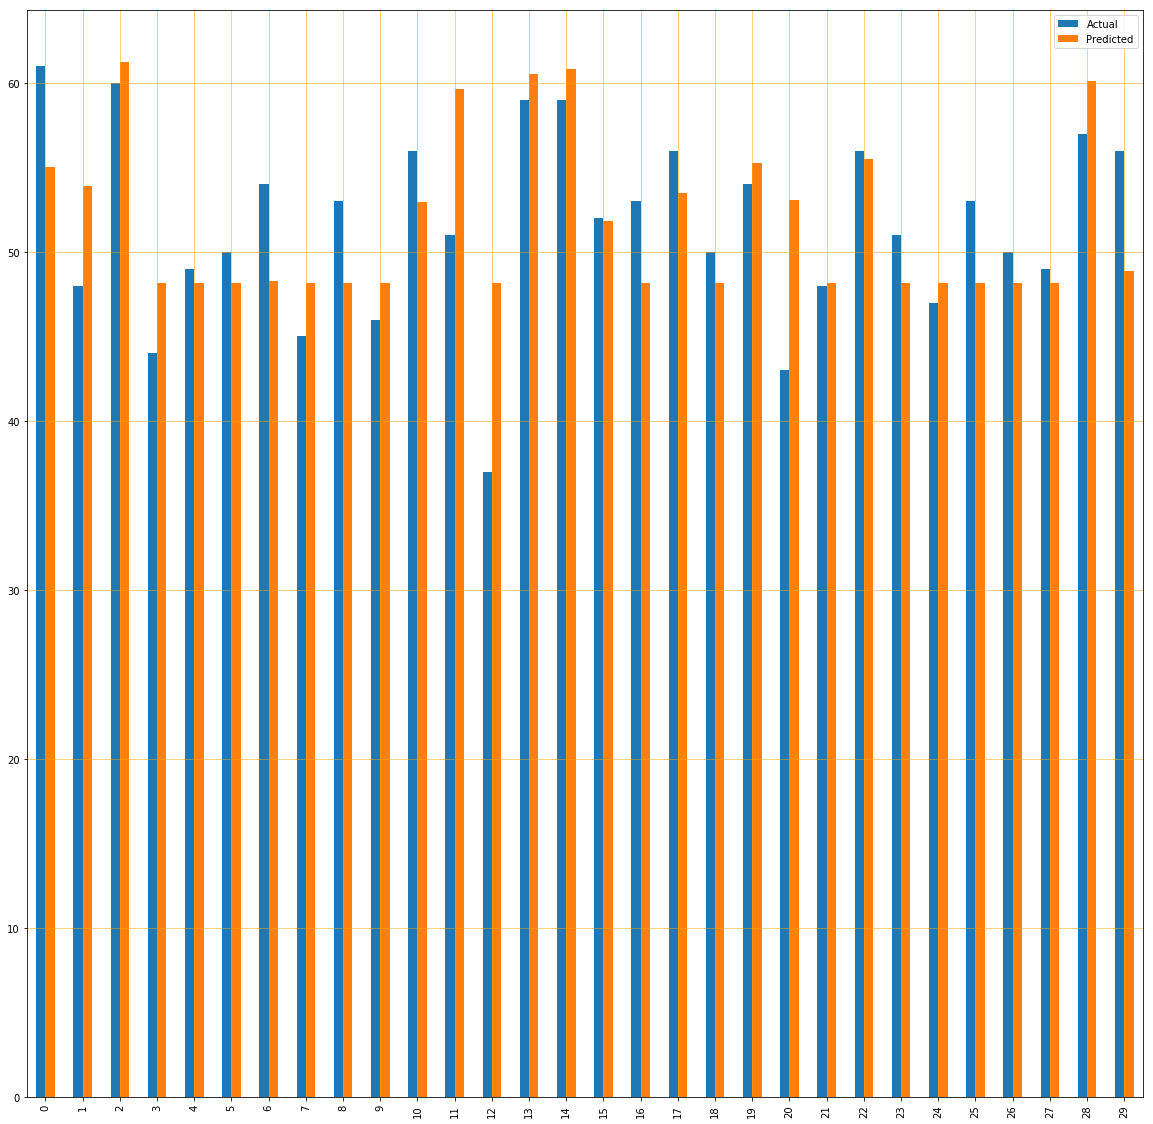

In [86]:
df1 = df.head(30)
df1.plot(kind='bar',figsize=(20,20))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='orange')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='orange')
plt.show()

Predicted percentage are quite close to actual one, which means that our algorithm is well trained

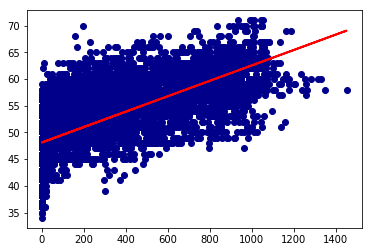

In [87]:
## Well, now it's time to plot our straight line ! 

plt.scatter(X_test, y_test,  color='darkblue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [88]:
## The final step is to evaluate the performance of the algorithm. 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.3428145712086974
Mean Squared Error: 17.923509301005502
Root Mean Squared Error: 4.2336165746327925


In [89]:
## You can see that the value of root mean squared error is 4.23, which is more than 10% of the mean value of the percentages of all the temperature. 
## This means that our algorithm was not accurate, but can still be used for a first approach.

## So what if simple linear regression doesn't work well ?

The best way to handle that is to choose the good amount of data and to train it well. Machine learning is all about that : training your model and realize that the training has not been good, that the predictions are not very accurate and start over again. Good luck !